In [1]:
#相關的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

#讀入資料
data_path = 'data/2020-ml100marathon-midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

In [2]:
#分割data跟label
df_train_y = df_train['poi']
df_train_x = df_train.drop(['poi'], axis=1)

In [3]:
#將label做編碼
train_y = LabelEncoder().fit_transform(df_train_y)

In [4]:
#將資料合併等等方便一起處理
df = pd.concat([df_train_x, df_test], axis=0)
df = df.reset_index(drop=True)

In [5]:
df_train_x

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,NaN,356071.0,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,400000.0,NaN,NaN,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,NaN,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [7]:
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,...,NaN,369721.0,425688.0,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
142,SHERRIFF JOHN R,1500000.0,NaN,NaN,NaN,john.sherriff@enron.com,1835558.0,NaN,92.0,28.0,...,NaN,554422.0,1852186.0,1293424.0,NaN,428780.0,2103.0,3187.0,4335388.0,3128982.0
143,GIBBS DANA R,NaN,504610.0,NaN,NaN,dana.gibbs@enron.com,2218275.0,NaN,12.0,0.0,...,NaN,461912.0,NaN,NaN,NaN,NaN,23.0,169.0,966522.0,2218275.0
144,LINDHOLM TOD A,200000.0,204075.0,NaN,NaN,tod.lindholm@enron.com,2549361.0,57727.0,NaN,NaN,...,NaN,175000.0,2630.0,514847.0,NaN,236457.0,NaN,NaN,875889.0,3064208.0


In [8]:
#職稱？了解資料中
'''df_train['Title'] = df_train['name'].str.split(" ", expand=True)[2]
df_train['Title']

df['Title'] = df['name'].str.split(" ", expand=True)[2]
df['Title']'''

0         D
1         K
2      None
3         J
4         F
       ... 
141       A
142       R
143       R
144       A
145    None
Name: Title, Length: 146, dtype: object

In [9]:
#df['name'][df['name'].apply(lambda x: x.find('JR'))!=-1]

9            GLISAN JR BEN F
21        OVERDYKE JR JERE C
56        BLAKE JR. NORMAN P
69         WALLS JR ROBERT H
71         WHITE JR THOMAS E
73     WINOKUR JR. HERBERT S
114       BOWEN JR RAYMOND M
121     DONAHUE JR JEFFREY M
127      DERRICK JR. JAMES V
Name: name, dtype: object

In [10]:
#temp = df_train['Title'].apply(lambda x: len(str(x))!=1 and x!=None)
#df_train[temp==True]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Title
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0,SCOTT
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0,BEN
21,OVERDYKE JR JERE C,NaN,NaN,NaN,NaN,jere.overdyke@enron.com,5266578.0,18834.0,NaN,NaN,...,176.0,False,2041016.0,NaN,94941.0,NaN,NaN,249787.0,7307594.0,JERE
38,PEREIRA PAULO V. FERRAZ,NaN,NaN,-101250.0,101250.0,NaN,NaN,27942.0,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,27942.0,NaN,V.
51,GARLAND C KEVIN,850000.0,NaN,NaN,NaN,kevin.garland@enron.com,636246.0,48405.0,44.0,10.0,...,60814.0,False,259907.0,NaN,231946.0,178.0,209.0,1566469.0,896153.0,KEVIN
56,BLAKE JR. NORMAN P,NaN,NaN,-113784.0,113784.0,NaN,NaN,1279.0,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,1279.0,NaN,NORMAN
65,THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,362096.0,False,NaN,NaN,NaN,NaN,NaN,362096.0,NaN,AGENCY
69,WALLS JR ROBERT H,850000.0,NaN,NaN,NaN,rob.walls@enron.com,4346544.0,50936.0,146.0,17.0,...,2.0,False,1552453.0,NaN,357091.0,215.0,671.0,1798780.0,5898997.0,ROBERT
71,WHITE JR THOMAS E,450000.0,NaN,NaN,NaN,thomas.white@enron.com,1297049.0,81353.0,NaN,NaN,...,1085463.0,False,13847074.0,NaN,317543.0,NaN,NaN,1934359.0,15144123.0,THOMAS
73,WINOKUR JR. HERBERT S,NaN,NaN,-25000.0,108579.0,NaN,NaN,1413.0,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,84992.0,NaN,HERBERT


In [11]:
'''
df['Title'][6] = 'F'
df['Title'][9] = 'F'
df['Title'][21] = 'C'
df['Title'][69] = 'V'
df['Title'][51] = 'C'
df['Title'][56] = 'P'
df['Title'][69] = 'H'
df['Title'][71] = 'E'
df['Title'][73] = 'S'
'''

C:\Users\julia\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\julia\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\julia\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [12]:
#df['Title'].unique()

array(['D', 'K', None, 'J', 'F', 'L', 'E', 'H', 'S', 'M', 'P', 'C', 'G',
       'R', 'A', 'V.', 'B', 'W', 'AGENCY', 'T', 'N', 'RAYMOND', 'JEFFREY',
       'JAMES'], dtype=object)

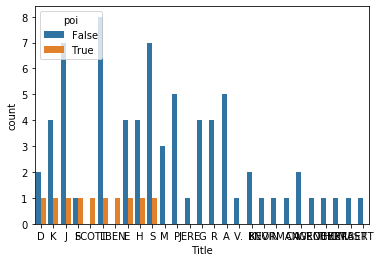

In [13]:
#sns.countplot(df_train['Title'], hue=df_train_y)

In [14]:
#df = pd.get_dummies(df, columns = ["Title"], prefix="Title")
#先刪除未處理的字串資料欄位
df = df.drop(['email_address', 'name'], axis=1)

In [15]:
#與嫌疑人的通訊數
df_train['message_with_poi'] = df_train['from_poi_to_this_person']+df_train['from_this_person_to_poi']

df['message_with_poi'] = df['from_poi_to_this_person']+df['from_this_person_to_poi']
df['message_with_poi']

0       46.0
1      118.0
2       27.0
3        NaN
4      224.0
       ...  
141     31.0
142     51.0
143      0.0
144      NaN
145     84.0
Name: message_with_poi, Length: 146, dtype: float64

In [16]:
#檢查空值比率
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


## EDA

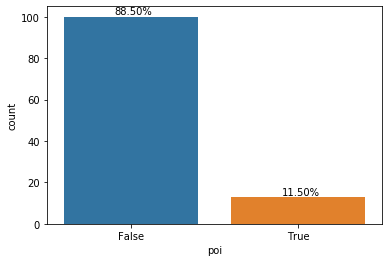

In [17]:
ax = sns.countplot(df_train_y)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_train_y)),
                (p.get_x()+0.3, #0.3只是調%的位置
                 p.get_height()+1))

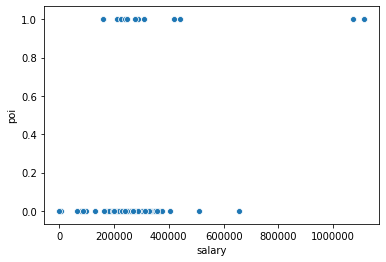

In [18]:
sns.scatterplot(df_train['salary'], df_train['poi'])

In [19]:
df_train[df_train['salary']>800000]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Title,message_with_poi
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,K,118.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,L,139.0


In [20]:
print('poi==true：', df_train['salary'][df_train['poi']==1].mean())
print('poi==false：', df_train['salary'][df_train['poi']==0].mean())

poi==true： 416859.8333333333
poi==false： 245779.77049180327


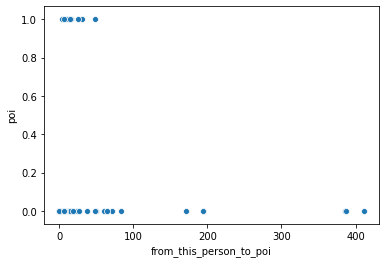

In [21]:
sns.scatterplot(df_train['from_this_person_to_poi'], df_train['poi'])

In [22]:
df_train[df_train['from_this_person_to_poi']>300]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Title,message_with_poi
33,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0,J,939.0
63,BECK SALLY W,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,...,False,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0,W,530.0
87,KEAN STEVEN J,1000000.0,NaN,NaN,NaN,steven.kean@enron.com,2022048.0,41953.0,6759.0,140.0,...,False,4131594.0,NaN,404338.0,3639.0,12754.0,1747522.0,6153642.0,J,527.0


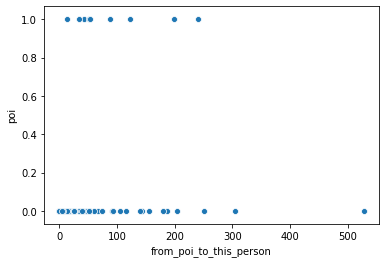

In [23]:
sns.scatterplot(df_train['from_poi_to_this_person'], df_train['poi'])

In [24]:
df_train[df_train['from_poi_to_this_person']>400]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,Title,message_with_poi
33,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0,J,939.0


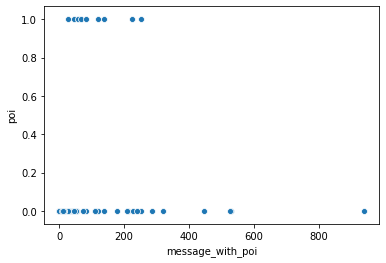

In [25]:
sns.scatterplot(df_train['message_with_poi'], df_train['poi'])

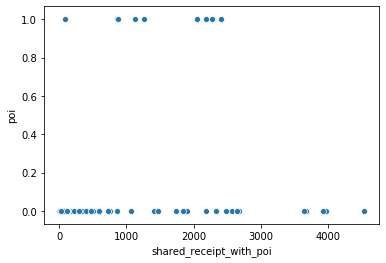

In [26]:
sns.scatterplot(df_train['shared_receipt_with_poi'], df_train['poi'])

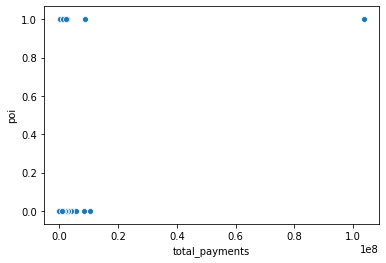

In [27]:
sns.scatterplot(df_train['total_payments'], df_train['poi'])

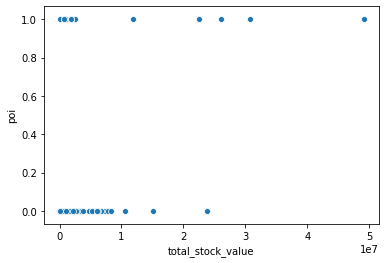

In [28]:
sns.scatterplot(df_train['total_stock_value'], df_train['poi'])

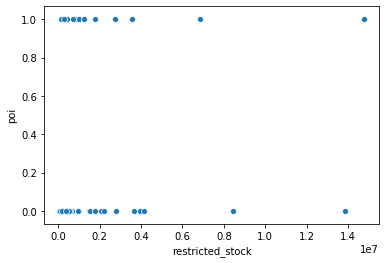

In [29]:
sns.scatterplot(df_train['restricted_stock'], df_train['poi'])

In [30]:
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,Title_M,Title_N,Title_P,Title_R,Title_RAYMOND,Title_S,Title_T,Title_V.,Title_W,message_with_poi
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,46.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,118.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,...,0,0,0,0,0,0,0,0,0,27.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1000000.0,NaN,NaN,NaN,1465734.0,38559.0,40.0,23.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,31.0
142,1500000.0,NaN,NaN,NaN,1835558.0,NaN,92.0,28.0,23.0,NaN,...,0,0,0,1,0,0,0,0,0,51.0
143,NaN,504610.0,NaN,NaN,2218275.0,NaN,12.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,0,0,0.0
144,200000.0,204075.0,NaN,NaN,2549361.0,57727.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [31]:
#標準化
df_fill = df.fillna(-1)
df_fill_scale = StandardScaler().fit_transform(df_fill)

#分割train跟test資料
df_train_final = df_fill_scale[:len(df_train_x)]
df_test_final = df_fill_scale[len(df_train_x):]
pd.DataFrame(df_train_final)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.051638,-0.160618,-1.317090,-0.163702,0.600880,-0.055186,-0.236833,0.056659,-0.251178,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.121643
1,0.528935,-0.160618,0.161497,-0.163702,0.579935,-0.096032,-0.174178,0.679440,0.077379,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,0.422256
2,-0.140520,-0.160618,0.159739,-0.163702,-0.098470,-0.110993,-0.222214,-0.335964,-0.124810,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.265171
3,-0.066136,-0.160618,0.161497,-0.163702,-0.160992,0.109885,-0.250061,-0.525506,-0.314362,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.476688
4,-0.010349,-0.160618,0.050742,-0.163702,-0.160992,-0.081000,-0.149115,2.182237,0.014195,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,1.222996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.103328,-0.160618,0.161497,-0.163702,-0.160992,-0.125765,-0.250061,-0.525506,-0.314362,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.476688
109,-0.165315,-0.160618,0.161497,-0.163702,-0.160992,-0.049764,-0.220821,-0.335964,-0.289088,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.363375
110,-0.128123,-0.160618,0.161497,-0.163702,-0.159884,-0.090659,-0.202721,-0.417197,-0.301725,-0.077957,...,-0.167836,-0.083045,-0.22441,4.456135,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.416254
111,-0.165315,-0.160618,0.161497,-0.163702,-0.160992,-0.162959,-0.236137,-0.457813,-0.213268,-0.119554,...,-0.167836,-0.083045,-0.22441,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.386038


In [32]:
pd.DataFrame(df_test_final)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.485544,0.624182,-0.823458,-0.163702,-0.124306,-0.123815,0.087585,2.574860,1.063049,-0.119554,...,-0.167836,12.041595,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,2.069061
1,0.002049,-0.160618,0.161146,-0.163702,-0.160992,-0.011226,-0.230568,1.383453,-0.112173,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,12.041595,-0.256307,-0.083045,-0.083045,-0.167836,0.701760
2,0.020645,-0.160618,-1.153647,-0.163702,0.052164,-0.085126,-0.227087,-0.078729,-0.036352,-0.119554,...,-0.167836,-0.083045,4.456135,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.068763
3,0.206605,-0.160618,0.161497,-0.163702,-0.072808,0.035772,1.887200,0.381588,7.394082,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,5.958188,4.629918
4,-0.041342,-0.160618,0.062345,-0.163702,-0.160992,-0.092929,-0.215252,0.273278,-0.150084,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,0.059657
5,0.045439,-0.160618,0.161497,-0.163702,-0.160992,0.065165,-0.230568,0.029581,-0.289088,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.159413
6,0.082631,2.191935,-1.259128,-0.163702,0.240591,0.037657,-0.234745,2.764402,-0.225904,0.088428,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,1.404296
7,-0.165315,-0.160618,0.119818,0.668901,-0.160992,-0.164062,-0.250061,-0.525506,-0.314362,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.476688
8,-0.066136,-0.160618,0.034920,-0.163702,-0.131512,0.059179,-0.234049,2.033311,-0.162720,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,1.034143
9,-0.152918,-0.141816,0.077112,-0.163702,-0.000849,-0.144560,-0.250061,-0.525506,-0.314362,-0.119554,...,-0.167836,-0.083045,-0.224410,-0.224410,-0.083045,-0.256307,-0.083045,-0.083045,-0.167836,-0.476688


## Build model

In [68]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(tol=0.001, 
                        penalty='l2', 
                        fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=0.1, 
                                  subsample=0.75, 
                                  n_estimators=350, 
                                  max_features=18,
                                  max_depth=2, 
                                  learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=350, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_features='sqrt', 
                            max_depth=3,
                            criterion='gini',
                            bootstrap=True)

In [69]:
lr.fit(df_train_final, train_y)
gdbt.fit(df_train_final, train_y)
rf.fit(df_train_final, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
df_train_final.shape

(113, 43)

In [71]:
from sklearn.metrics import accuracy_score
print("linear accuracy：", accuracy_score(lr.predict(df_train_final), train_y)) 
print("gdbt accuracy：", accuracy_score(gdbt.predict(df_train_final), train_y)) #overfitting
print("rf accuracy：", accuracy_score(rf.predict(df_train_final), train_y)) #best

linear accuracy： 0.9292035398230089
gdbt accuracy： 1.0
rf accuracy： 0.911504424778761


In [77]:
name = df_test['name'] #做表格用

In [73]:
lr_p = lr.predict_proba(df_test_final)[:,1]
sub = pd.DataFrame({'name': name, 'poi': lr_p})
sub.to_csv('Midterm_lr_p.csv', index=False)

In [74]:
gdbt_p = gdbt.predict_proba(df_test_final)[:,1]
sub = pd.DataFrame({'name': name, 'poi': gdbt_p})
sub.to_csv('Midterm_gdbt_p.csv', index=False)

In [75]:
rf_p = rf.predict_proba(df_test_final)[:,1]
sub = pd.DataFrame({'name': name, 'poi': rf_p})
sub.to_csv('Midterm_rf_p_350_3.csv', index=False)

In [65]:
'''from mlxtend.classifier import StackingClassifier

meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                            max_features='sqrt', max_depth=6, learning_rate=0.3)

stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier = meta_estimator)

stacking.fit(df_train_final, train_y)

print("stacking accuracy：", accuracy_score(rf.predict(df_train_final), train_y))'''

stacking accuracy： 0.9203539823008849


In [67]:
'''stacking_pred = stacking.predict_proba(df_test_final)[:,1]
sub = pd.DataFrame({'name': name, 'poi': stacking_pred})
sub.to_csv('Midterm_stacking_deal_overfitting.csv', index=False)
'''

In [76]:
blending_pred = lr_p*0.1 + gdbt_p*0.3 + rf_p*0.6
sub = pd.DataFrame({'name': name, 'poi': blending_pred})
sub.to_csv('Midterm_blending_p_no_overfit.csv', index=False)